In [129]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
from utils import *

In [3]:
state_cols_1 = ['ER', 'series_id_0', 'series_id_1', 'series_id_2', 'series_id_3', 'gpl_0', 'gpl_1', 'gpl_2', 'pam_coincide_0', 'pam_coincide_1', 'pam_coincide_2', 'pam_coincide_3', 'pam_coincide_4', 'radiotherapyClass_0', 'radiotherapyClass_1', 'p5_0', 'p5_1', 'p5_2', 'p5_3', 'p5_4']
ge_state_nn = pd.read_csv("datasets/ge_state_outcome_tamoxifen_v3.csv",
            index_col="patient_ID")
ge_df = ge_state_nn[ge_state_nn.columns.difference(state_cols_1)]
ge_df

,A4GALT,AAAS,AACS,AADAC,AAK1,AAMP,AANAT,AARS,AARSD1,AASDHPPT,...,ZP2,ZPBP,ZSCAN2,ZW10,ZWINT,ZXDC,ZYX,ZZEF1,ZZZ3,posOutcome
patient_ID,,,,,,,,,,,,,,,,,,,,,
249296,4.664051,5.331150,7.126872,4.296764,4.716382,6.412946,4.153878,8.731168,5.068564,6.777534,...,3.458515,2.366422,3.493543,4.502112,7.000903,5.250279,8.595672,4.591821,5.901994,0
249524,4.218617,5.451971,7.483900,4.064093,5.284597,5.947109,3.170668,8.479083,5.785558,7.896858,...,2.912184,2.491172,3.011831,5.192674,5.999150,4.597011,8.041897,4.905542,8.131689,1
249527,4.481819,6.174727,8.191183,2.564228,4.500322,6.919824,3.452601,8.982715,5.571973,7.888242,...,2.954979,2.295199,3.118038,5.181799,5.665467,4.806405,8.775220,4.301683,5.929492,0
249529,4.673300,5.642042,7.362706,2.967516,4.010832,6.559165,3.886112,8.801044,5.849917,7.330794,...,3.324211,2.267870,3.371561,4.666363,6.405824,5.002028,8.645329,4.421538,5.530777,0
249530,4.751811,6.319986,8.600319,2.798135,4.662354,7.380506,3.602703,9.012348,5.554337,8.226949,...,2.572928,2.327541,3.318911,5.326518,5.581286,4.960007,8.778932,4.873731,5.715205,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305260,3.426381,5.768145,7.905766,3.240755,5.892294,7.772861,3.202970,7.107005,5.831064,6.319643,...,3.144302,3.158701,3.521218,4.108018,7.274987,5.773784,6.179846,5.780236,6.254059,1
305261,3.420373,5.345412,8.006344,3.240755,6.770604,7.135544,3.202970,7.260247,5.583641,6.552227,...,3.144302,3.158701,3.521218,3.830114,8.424351,5.322723,6.510751,5.732561,6.278364,1
305262,3.426381,5.335712,7.368003,3.240755,5.430695,6.166192,3.202970,5.489873,4.955997,7.501677,...,3.144302,3.158701,3.521218,3.595001,9.804475,4.587512,3.799424,6.155523,7.120667,1


In [4]:
X_train, X_test, y_train, y_test = get_train_test_set(ge_df, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")
mq_norm = MQNormalizer(n_quantiles=5, subsample=X_train.shape[0])
X_train_q = mq_norm.fit_transform(X_train)
X_train_q

,A4GALT_overexpr,AAAS_overexpr,AACS_overexpr,AADAC_overexpr,AAK1_overexpr,AAMP_overexpr,AANAT_overexpr,AARS_overexpr,AARSD1_overexpr,AASDHPPT_overexpr,...,ZNHIT2_underexpr,ZP2_underexpr,ZPBP_underexpr,ZSCAN2_underexpr,ZW10_underexpr,ZWINT_underexpr,ZXDC_underexpr,ZYX_underexpr,ZZEF1_underexpr,ZZZ3_underexpr
22473,0.831508,0.000000,0.000000,0.000000,0.626720,0.801178,0.810730,0.000000,0.000000,0.000000,...,0.804665,0.000000,0.791135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.823509
249608,0.000000,0.000000,0.000000,0.755451,0.700158,0.793460,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.856101,0.000000,0.000000,0.553647,0.000000,0.790472,0.000000,0.768952
249599,0.000000,0.814407,0.000000,0.753672,0.000000,0.748041,0.000000,0.745291,0.000000,0.000000,...,0.831106,0.777969,0.000000,0.697827,0.680322,0.000000,0.000000,0.631057,0.000000,0.566916
441791,0.000000,0.751467,0.624330,0.000000,0.736776,0.753295,0.750000,0.551357,0.000000,0.000000,...,0.000000,0.000000,0.750000,0.000000,0.000000,0.578221,0.000000,0.565844,0.751681,0.000000
249560,0.758039,0.000000,0.000000,0.761709,0.763503,0.000000,0.750807,0.000000,0.828650,0.000000,...,0.000000,0.803881,0.000000,0.746243,0.772382,0.000000,0.000000,0.616661,0.000000,0.841256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.916775,0.506245,0.000000,0.000000,0.766349,0.540573,0.831551,0.000000,0.609678,0.780156,...,0.559906,0.799117,0.761079,0.000000,0.000000,0.000000,0.000000,0.000000,0.781229,0.000000
441685,0.000000,0.000000,0.509432,0.000000,0.791022,0.779249,0.000000,0.825678,0.672456,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.810353,0.776488,0.000000,0.782415,0.000000,0.000000
441899,0.000000,0.571748,0.000000,0.000000,0.769146,0.000000,0.750000,0.000000,0.595022,0.000000,...,0.000000,0.000000,0.750000,0.000000,0.751731,0.805247,0.000000,0.000000,0.000000,0.782445
305219,0.783709,0.000000,0.554413,0.750000,0.549552,0.587479,0.000000,0.612321,0.000000,0.000000,...,0.757612,0.680074,0.000000,0.750000,0.779700,0.756118,0.752050,0.000000,0.780811,0.000000


In [162]:
X_train_med = X_train - mq_norm.medians
X_train_med.loc[441791]["CLCN2"]

0.0

In [166]:
print(X_train.loc[249560]["CLCN2"] == X_train["CLCN2"].median())

False


In [155]:
X_train_q[["CLCN2_overexpr", 	"CLCN2_underexpr"]]

,CLCN2_overexpr,CLCN2_underexpr
22473,0.792270,0.000000
249608,0.000000,0.854090
249599,0.770970,0.000000
441791,0.000000,0.000000
249560,0.769942,0.000000
...,...,...
22502,0.811739,0.000000
441685,0.000000,0.750000
441899,0.668430,0.000000
305219,0.000000,0.561108


In [5]:
X_test_q = mq_norm.transform(X_test)
X_test_q

,A4GALT_overexpr,AAAS_overexpr,AACS_overexpr,AADAC_overexpr,AAK1_overexpr,AAMP_overexpr,AANAT_overexpr,AARS_overexpr,AARSD1_overexpr,AASDHPPT_overexpr,...,ZNHIT2_underexpr,ZP2_underexpr,ZPBP_underexpr,ZSCAN2_underexpr,ZW10_underexpr,ZWINT_underexpr,ZXDC_underexpr,ZYX_underexpr,ZZEF1_underexpr,ZZZ3_underexpr
249540,0.847748,0.766185,0.824676,0.00,0.000000,0.813642,0.774604,0.927372,0.602192,0.863070,...,0.00,0.974761,0.948212,0.000000,0.000000,0.883564,0.506928,0.000000,0.839701,0.660961
441885,0.000000,0.794939,0.555222,0.00,0.642228,0.000000,0.750000,0.000000,0.811655,0.000000,...,0.00,0.000000,0.750000,0.000000,0.000000,0.846990,0.000000,0.000000,0.689889,0.000000
441672,0.000000,0.000000,0.783827,0.00,0.732735,0.754561,0.000000,0.609105,0.000000,0.000000,...,0.00,0.750000,0.000000,0.628329,0.000000,0.000000,0.519482,0.000000,0.000000,0.759948
441746,0.000000,0.000000,0.000000,0.00,0.000000,0.770115,0.750000,0.000000,0.803703,0.737676,...,0.00,0.000000,0.750000,0.000000,0.511405,0.000000,0.000000,0.779612,0.782534,0.000000
305151,0.000000,0.772410,0.763119,0.75,0.521725,0.616423,0.000000,0.773104,0.000000,0.843849,...,0.00,0.680074,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.744926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441908,0.000000,0.000000,0.592159,0.00,0.000000,0.000000,0.750000,0.803280,0.572844,0.000000,...,0.00,0.000000,0.750000,0.000000,0.000000,0.524909,0.646032,0.000000,0.000000,0.000000
441675,0.000000,0.544965,0.835969,0.00,0.754077,0.683262,0.000000,0.756302,0.778632,0.000000,...,0.00,0.750000,0.000000,0.628329,0.804178,0.000000,0.000000,0.755952,0.000000,0.782249
441765,0.000000,0.000000,0.000000,0.00,0.000000,0.643280,0.750000,0.000000,0.000000,0.638380,...,0.00,0.000000,0.750000,0.000000,0.761074,0.799206,0.000000,0.000000,0.000000,0.000000
305133,0.000000,0.000000,0.787001,0.75,0.770104,0.820925,0.000000,0.941826,0.767994,0.530886,...,0.00,0.680074,0.000000,0.000000,0.000000,0.574932,0.000000,0.000000,0.516633,0.791179


In [141]:
X_ge_st_train, X_ge_st_test = ge_state_nn[state_cols_1].loc[X_train.index,:], ge_state_nn[state_cols_1].loc[X_test.index,:]
X_ge_st_train, X_ge_st_test = pd.merge(X_train_q, X_ge_st_train, left_index=True, right_index=True), pd.merge(X_test_q, X_ge_st_test,
                                                                                        left_index=True, right_index=True)
X_ge_st_train

,A4GALT_overexpr,AAAS_overexpr,AACS_overexpr,AADAC_overexpr,AAK1_overexpr,AAMP_overexpr,AANAT_overexpr,AARS_overexpr,AARSD1_overexpr,AASDHPPT_overexpr,...,pam_coincide_2,pam_coincide_3,pam_coincide_4,radiotherapyClass_0,radiotherapyClass_1,p5_0,p5_1,p5_2,p5_3,p5_4
22473,0.831508,0.000000,0.000000,0.000000,0.626720,0.801178,0.810730,0.000000,0.000000,0.000000,...,1,0,0,1,0,1,0,0,0,0
249608,0.000000,0.000000,0.000000,0.755451,0.700158,0.793460,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
249599,0.000000,0.814407,0.000000,0.753672,0.000000,0.748041,0.000000,0.745291,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
441791,0.000000,0.751467,0.624330,0.000000,0.736776,0.753295,0.750000,0.551357,0.000000,0.000000,...,1,0,0,1,0,1,0,0,0,0
249560,0.758039,0.000000,0.000000,0.761709,0.763503,0.000000,0.750807,0.000000,0.828650,0.000000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22502,0.916775,0.506245,0.000000,0.000000,0.766349,0.540573,0.831551,0.000000,0.609678,0.780156,...,1,0,0,1,0,0,0,0,1,0
441685,0.000000,0.000000,0.509432,0.000000,0.791022,0.779249,0.000000,0.825678,0.672456,0.000000,...,1,0,0,1,0,0,0,0,1,0
441899,0.000000,0.571748,0.000000,0.000000,0.769146,0.000000,0.750000,0.000000,0.595022,0.000000,...,1,0,0,1,0,1,0,0,0,0
305219,0.783709,0.000000,0.554413,0.750000,0.549552,0.587479,0.000000,0.612321,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0


In [6]:
from pymrmre import mrmr

# solutions = mrmr.mrmr_ensemble(features=X_train_norm, targets=y_train.to_frame(), solution_length=100, solution_count=1)
# feats_100 = solutions[0][0]

feats_100 = load_features("/var/www/datasets/feats_100_mrmr_tamoxifen_qnormalized.txt")

In [130]:
params_q_auc, clf_q_auc, cv_score_q_auc, test_scores_q_auc = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:34:50] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:34:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.38 seconds.
Best Score: 85.065%
{'subsample': 0.6, 'scale_pos_weight': 0.7, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8}
[12:35:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.0s finished


In [131]:
params_q_ap, clf_q_ap, cv_score_q_ap, test_scores_q_ap = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:35:06] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:35:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.73 seconds.
Best Score: 25.115%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[12:35:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.6s finished


In [132]:
params_q_acc, clf_q_acc, cv_score_q_acc, test_scores_q_acc = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:35:14] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:35:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.22 seconds.
Best Score: 74.027%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[12:35:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished


In [135]:
print_score_comparison_v2(cv_score_q_auc, cv_score_q_ap, test_scores_q_auc, test_scores_q_ap, header_1="AUC Opt", header_2="AP Opt")

	Validation set - Balanced Opt

			AUC Opt				AP Opt
		-------------------------------------------------------
balanced_accuracy:	71.24%				59.10%

recall_0:		49.17%				87.50%

precision_0:		72.35%				31.51%

recall_1:		93.31%				30.71%

precision_1:		83.51%				87.36%

auc:			85.06%				77.96%



	Test set - Balanced Opt

			AUC Opt				AP Opt
		-------------------------------------------------------
balanced_accuracy:	60.13%				64.11%

recall_0:		29.41%				90.20%

precision_0:		53.57%				34.33%

recall_1:		90.85%				38.03%

precision_1:		78.18%				91.53%

auc:			73.06%				73.42%



In [136]:
print_score_comparison_v2(cv_score_q_acc, cv_score_q_ap, test_scores_q_acc, test_scores_q_ap, header_1="Acc Opt", header_2="AP Opt")

	Validation set - Balanced Opt

			Acc Opt				AP Opt
		-------------------------------------------------------
balanced_accuracy:	74.03%				59.10%

recall_0:		64.17%				87.50%

precision_0:		59.12%				31.51%

recall_1:		83.89%				30.71%

precision_1:		86.65%				87.36%

auc:			82.76%				77.96%



	Test set - Balanced Opt

			Acc Opt				AP Opt
		-------------------------------------------------------
balanced_accuracy:	68.02%				64.11%

recall_0:		52.94%				90.20%

precision_0:		52.94%				34.33%

recall_1:		83.10%				38.03%

precision_1:		83.10%				91.53%

auc:			74.91%				73.42%



In [144]:
params_q_st_auc, clf_q_st_auc, cv_score_q_st_auc, test_scores_q_st_auc = evaluate_ge((X_ge_st_train, X_ge_st_test, y_train, y_test), split=False, feats=feats_100, outcome_cols=state_cols_1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:45:14] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:45:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 3.5 seconds.
Best Score: 85.095%
{'subsample': 0.6, 'scale_pos_weight': 0.5, 'n_estimators': 120, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
[12:45:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.2s finished


In [145]:
params_q_st_ap, clf_q_st_ap, cv_score_q_st_ap, test_scores_q_st_ap = evaluate_ge((X_ge_st_train, X_ge_st_test, y_train, y_test), split=False, feats=feats_100, outcome_cols=state_cols_1, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:45:35] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:45:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.93 seconds.
Best Score: 25.115%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[12:45:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.8s finished


In [146]:
params_q_st_acc, clf_q_st_acc, cv_score_q_st_acc, test_scores_q_st_acc = evaluate_ge((X_ge_st_train, X_ge_st_test, y_train, y_test), split=False, feats=feats_100, outcome_cols=state_cols_1, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:45:43] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:45:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.28 seconds.
Best Score: 73.838%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'max_delta_step': 4, 'learning_rate': 0.07, 'gamma': 1.5, 'colsample_bytree': 0.6}
[12:45:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.7s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.2s finished


In [147]:
print_score_comparison_v2(cv_score_q_acc, cv_score_q_st_acc, test_scores_q_acc, test_scores_q_st_acc, header_1="GE Only",
                          header_2="GE + State", opt="Acc")

	Validation set - Acc

			GE Only				GE + State
		-------------------------------------------------------
balanced_accuracy:	74.03%				73.84%

recall_0:		64.17%				61.67%

precision_0:		59.12%				61.45%

recall_1:		83.89%				86.01%

precision_1:		86.65%				86.11%

auc:			82.76%				82.67%



	Test set - Acc

			GE Only				GE + State
		-------------------------------------------------------
balanced_accuracy:	68.02%				68.10%

recall_0:		52.94%				50.98%

precision_0:		52.94%				55.32%

recall_1:		83.10%				85.21%

precision_1:		83.10%				82.88%

auc:			74.91%				74.95%



In [137]:
clf_q_ap.save_model("datasets/models/clf_qnorm_v2.json")

In [21]:
import joblib

joblib.dump(mq_norm, "datasets/models/qn_transformer.gz")

['datasets/models/qn_transformer.gz']

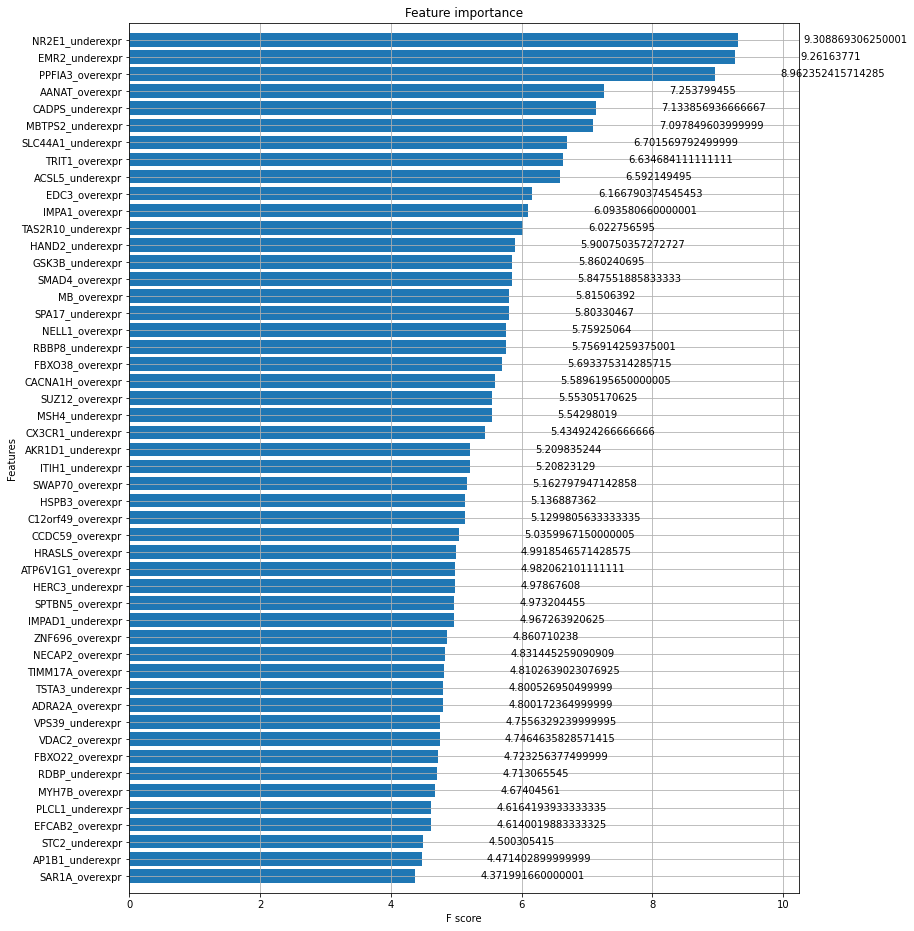

In [148]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(12, 16))
plot_importance(clf_q_acc, max_num_features=50, height=0.8, ax=ax, importance_type='gain')
plt.show()

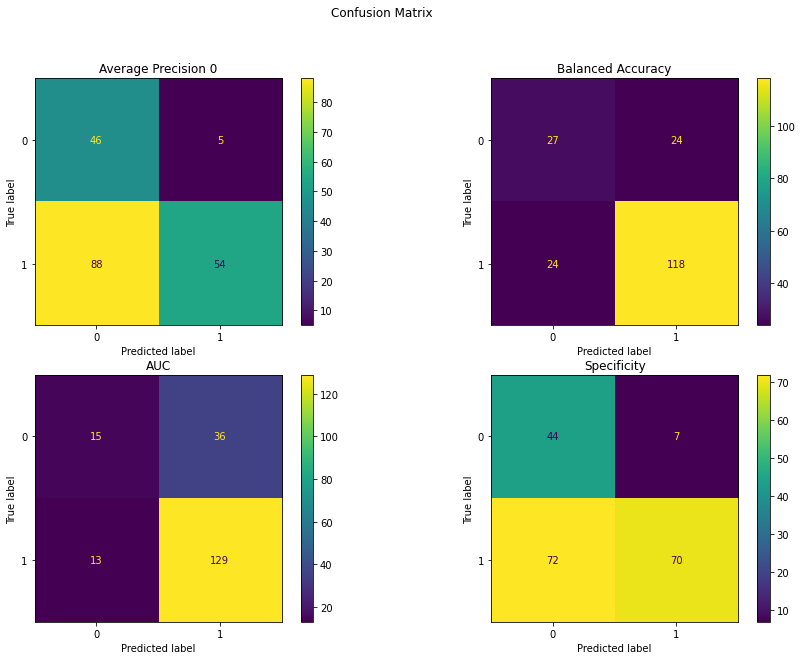

In [140]:
figs_1, axs_1 = plt.subplots(2, 2, figsize=(15, 10))
figs_1.suptitle("Confusion Matrix")
axs_1[0, 0].set_title("Average Precision 0")
axs_1[0, 1].set_title("Balanced Accuracy")
axs_1[1, 0].set_title("AUC")
axs_1[1, 1].set_title("Specificity")
plot_confusion_matrix(clf_q_ap, X_test_q[feats_100], y_test, ax=axs_1[0, 0])
plot_confusion_matrix(clf_q_acc, X_test_q[feats_100], y_test, ax=axs_1[0, 1])
plot_confusion_matrix(clf_q_auc, X_test_q[feats_100], y_test, ax=axs_1[1, 0])

In [16]:
df_train = pd.concat([y_train, X_train_q], axis=1)
df_train.to_csv("datasets/train_tamoxifen_qnormalized.csv")
df_test = pd.concat([y_test, X_test_q], axis=1)
df_test.to_csv("datasets/test_tamoxifen_qnormalized.csv")

In [19]:
#save in /var/www/datasets so it can be accessed publicly
df_train.to_csv("/var/www/datasets/train_tamoxifen_qnormalized.csv", index_label="patient_ID")
df_test.to_csv("/var/www/datasets/test_tamoxifen_qnormalized.csv", index_label="patient_ID")

In [47]:
with open("/var/www/datasets/feats_100_mrmr_tamoxifen_qnormalized.txt", "w") as fp:
    for gene in feats_100:
        fp.write("{0}\n".format(gene))

In [ ]:
# trying various feature numbers
feats_score = {}
for i in range(50, 550, 50):
    slns = mrmr.mrmr_ensemble(features=X_train_q, targets=y_train.to_frame(), solution_length=i, solution_count=1)
    fts = slns[0][0]
    _, _, cv_scores_fts, test_scores_fts = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, rand_scoring="balanced_accuracy",
                feats=fts)
    feats_score[i] = []
    feats_score[i].append(cv_scores_fts.mean().to_dict())
    feats_score[i].append(test_scores_fts.mean().to_dict())
acc_scores_train = []
specificity_scores_train = []
auc_scores_train = []
recall_1_scores_train = []
for k in feats_score:
    acc_scores_train.append(feats_score[k][0]["balanced_accuracy"])
    specificity_scores_train.append(feats_score[k][0]["specificity"])
    auc_scores_train.append(feats_score[k][0]["auc"])
    recall_1_scores_train.append(feats_score[k][0]["recall_1"])

acc_scores_test = []
specificity_scores_test = []
auc_scores_test = []
recall_1_scores_test = []
for k in feats_score:
    acc_scores_test.append(feats_score[k][1]["balanced_accuracy"])
    specificity_scores_test.append(feats_score[k][1]["specificity"])
    auc_scores_test.append(feats_score[k][1]["auc"])
    recall_1_scores_test.append(feats_score[k][1]["recall_1"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[12:50:32] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:50:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 1.31 seconds.
Best Score: 76.648%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[12:50:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    2.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    3.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.2s finished
[Parallel(n_jobs=

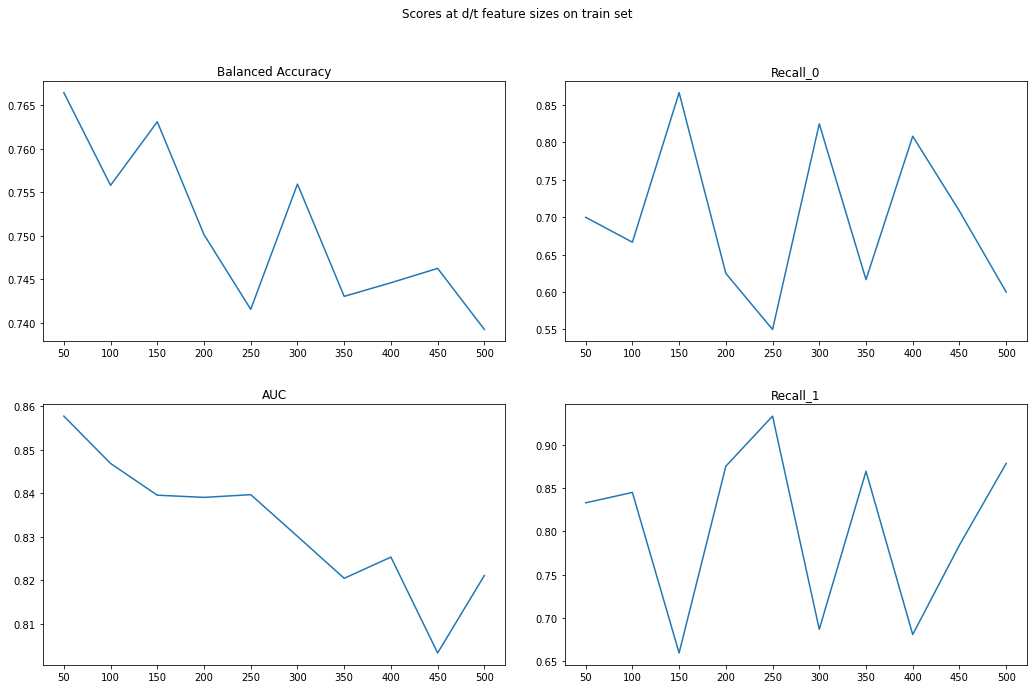

In [150]:
from matplotlib.ticker import MaxNLocator
counts = [x for x in range(50, 550, 50)]
fig_train, axs_train = plt.subplots(2, 2, figsize=(15, 10))
fig_train.suptitle("Scores at d/t feature sizes on train set")
axs_train[0, 0].plot(counts, acc_scores_train)
axs_train[0, 0].set_title("Balanced Accuracy")
axs_train[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[0, 1].plot(counts, specificity_scores_train)
axs_train[0, 1].set_title("Recall_0")
axs_train[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[1, 0].plot(counts, auc_scores_train)
axs_train[1, 0].set_title("AUC")
axs_train[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_train[1, 1].plot(counts, recall_1_scores_train)
axs_train[1, 1].set_title("Recall_1")
axs_train[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
fig_train.tight_layout(pad=3.0)

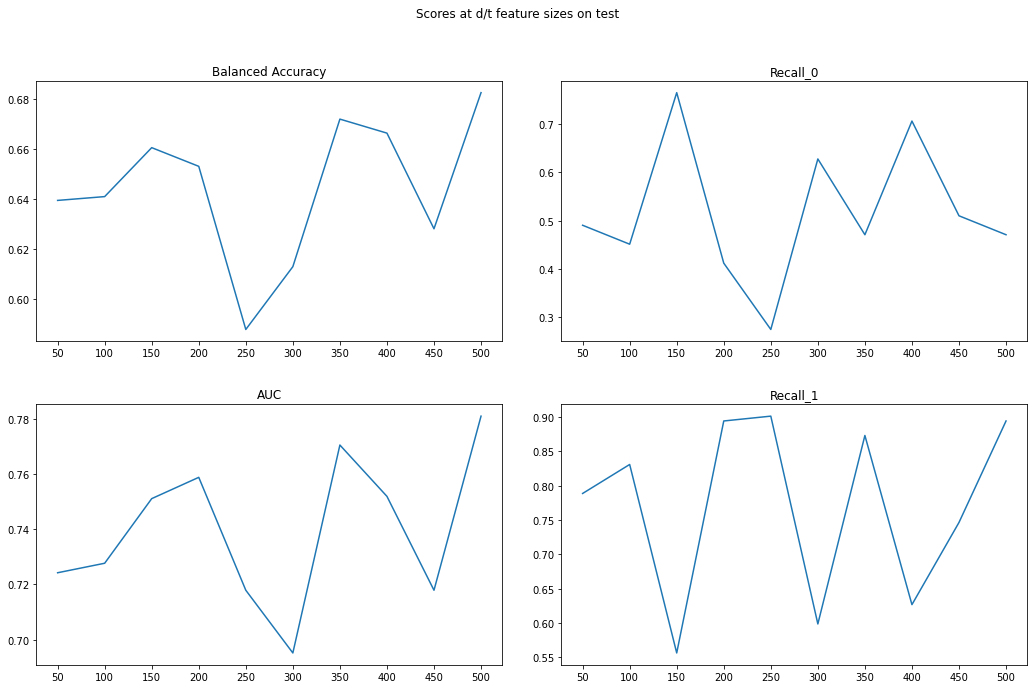

In [151]:
counts = [x for x in range(50, 550, 50)]
fig_test, axs_test = plt.subplots(2, 2, figsize=(15, 10))
fig_test.suptitle("Scores at d/t feature sizes on test")
axs_test[0, 0].plot(counts, acc_scores_test)
axs_test[0, 0].set_title("Balanced Accuracy")
axs_test[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[0, 1].plot(counts, specificity_scores_test)
axs_test[0, 1].set_title("Recall_0")
axs_test[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[1, 0].plot(counts, auc_scores_test)
axs_test[1, 0].set_title("AUC")
axs_test[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
axs_test[1, 1].plot(counts, recall_1_scores_test)
axs_test[1, 1].set_title("Recall_1")
axs_test[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=10))
fig_test.tight_layout(pad=3.0)

In [152]:
sorted_idx_train = np.argsort(acc_scores_train)
sorted_idx_test = np.argsort(acc_scores_test)
print("Highest accuracy on train: {0:.2%} at {1} features".format(acc_scores_train[sorted_idx_train[-1]], (sorted_idx_train[-1] + 1)*50))
print("Highest accuracy on test: {0:.2%} at {1} features".format(acc_scores_test[sorted_idx_test[-1]], (sorted_idx_test[-1] + 1)*50))

Highest accuracy on train: 76.65% at 50 features
Highest accuracy on test: 68.25% at 500 features


In [153]:
# trying various feature numbers
feat_scores_rev = {}
for i in range(5, 100, 5):
    slns = mrmr.mrmr_ensemble(features=X_train_q, targets=y_train.to_frame(), solution_length=i, solution_count=1)
    fts = slns[0][0]
    _, _, cv_scores_fts, test_scores_fts = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, rand_scoring="balanced_accuracy",
                feats=fts)
    feat_scores_rev[i] = []
    feat_scores_rev[i].append(cv_scores_fts.mean().to_dict())
    feat_scores_rev[i].append(test_scores_fts.mean().to_dict())

acc_scores_train_rev = []
specificity_scores_train_rev = []
auc_scores_train_rev = []
recall_1_scores_train_rev = []
for k in feat_scores_rev:
    acc_scores_train_rev.append(feat_scores_rev[k][0]["balanced_accuracy"])
    specificity_scores_train_rev.append(feat_scores_rev[k][0]["specificity"])
    auc_scores_train_rev.append(feat_scores_rev[k][0]["auc"])
    recall_1_scores_train_rev.append(feat_scores_rev[k][0]["recall_1"])

acc_scores_test_rev = []
specificity_scores_test_rev = []
auc_scores_test_rev = []
recall_1_scores_test_rev = []
for k in feat_scores_rev:
    acc_scores_test_rev.append(feat_scores_rev[k][1]["balanced_accuracy"])
    specificity_scores_test_rev.append(feat_scores_rev[k][1]["specificity"])
    auc_scores_test_rev.append(feat_scores_rev[k][1]["auc"])
    recall_1_scores_test_rev.append(feat_scores_rev[k][1]["recall_1"])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:52:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:52:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 1.64 seconds.
Best Score: 72.763%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:53:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parall

In [ ]:

counts = [x for x in range(5, 100, 5)]
fig_train_rev, axs_train_rev = plt.subplots(2, 2, figsize=(15, 10))
fig_train_rev.suptitle("Scores at d/t feature sizes on train set")
axs_train_rev[0, 0].plot(counts, acc_scores_train_rev)
axs_train_rev[0, 0].set_title("Balanced Accuracy")
axs_train_rev[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[0, 1].plot(counts, specificity_scores_train_rev)
axs_train_rev[0, 1].set_title("Recall_0")
axs_train_rev[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[1, 0].plot(counts, auc_scores_train_rev)
axs_train_rev[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_train_rev[1, 0].set_title("AUC")
axs_train_rev[1, 1].plot(counts, recall_1_scores_train_rev)
axs_train_rev[1, 1].set_title("Recall_1")
axs_train_rev[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
fig_train_rev.tight_layout(pad=3.0)

In [ ]:
counts = [x for x in range(5, 100, 5)]
fig_test_rev, axs_test_rev = plt.subplots(2, 2, figsize=(15, 10))
fig_test_rev.suptitle("Scores at d/t feature sizes on test")
axs_test_rev[0, 0].plot(counts, acc_scores_test_rev)
axs_test_rev[0, 0].set_title("Balanced Accuracy")
axs_test_rev[0, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[0, 1].plot(counts, specificity_scores_test_rev)
axs_test_rev[0, 1].set_title("Recall_0")
axs_test_rev[0, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[1, 0].plot(counts, auc_scores_test_rev)
axs_test_rev[1, 0].set_title("AUC")
axs_test_rev[1, 0].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
axs_test_rev[1, 1].plot(counts, recall_1_scores_test_rev)
axs_test_rev[1, 1].set_title("Recall_1")
axs_test_rev[1, 1].get_xaxis().set_major_locator(MaxNLocator(integer=True, min_n_ticks=5))
fig_test_rev.tight_layout(pad=3.0)

In [ ]:
sorted_idx_train_rev = np.argsort(acc_scores_train_rev)
sorted_idx_test_rev = np.argsort(acc_scores_test_rev)
print("Highest accuracy on train: {0:.2%} at {1} features".format(acc_scores_train_rev[sorted_idx_train_rev[-1]], (sorted_idx_train_rev[-1] + 1)*5))
print("Highest accuracy on test: {0:.2%} at {1} features".format(acc_scores_test_rev[sorted_idx_test_rev[-1]], (sorted_idx_test_rev[-1] + 1)*5))


In [11]:
solutions_2  = mrmr.mrmr_ensemble(features=X_train_norm, targets=y_train.to_frame(), solution_length=200, solution_count=1)
feats_200 = solutions_2[0][0]

In [12]:
params_q_fts_200_ap, clf_q_fts_200_ap, cv_score_q_fts_200_ap, test_scores_q_fts_200_ap = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_200, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:04:49] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:04:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 15.95 seconds.
Best Score: 24.350%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[11:05:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   14.8s finished


In [25]:
solutions_3  = mrmr.mrmr_ensemble(features=X_train_norm, targets=y_train.to_frame(), solution_length=400, solution_count=1)
feats_400 = solutions_3[0][0]

In [26]:
params_q_fts_400_ap, clf_q_fts_400_ap, cv_score_q_fts_400_ap, test_scores_q_fts_400_ap = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_400, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[23:02:41] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:02:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 31.94 seconds.
Best Score: 24.055%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[23:03:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric use

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   29.8s finished


In [16]:
params_q_fts_200_ap_v2, clf_q_fts_200_ap_v2, cv_score_q_fts_200_ap_v2, test_scores_q_fts_200_ap_v2 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_200, rand_scoring=average_precision_1)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:12:30] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 16.8 seconds.
Best Score: 85.871%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 600, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[11:13:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.4s finished


In [48]:
print_score_comparison(test_scores_q_v2, test_scores_q_fts_200_ap, header_1="100 Feats", header_2="200 feats", title="Test set")

	Test set	posOutcome
			100 Feats		200 feats
		-------------------------------------------------------
balanced_accuracy:	68.77%				69.62%

recall_0:		88.24%				84.31%

precision_0:		38.46%				40.19%

recall_1:		49.30%				54.93%

precision_1:		92.11%				90.70%

auc:			74.22%				72.89%



In [50]:
print_score_comparison(test_scores_q, test_scores_q_fts_200_ap_v2, header_1="100 Feats", header_2="200 feats", title="Test set")

	Test set	posOutcome
			100 Feats		200 feats
		-------------------------------------------------------
balanced_accuracy:	64.60%				65.15%

recall_0:		41.18%				45.10%

precision_0:		55.26%				52.27%

recall_1:		88.03%				85.21%

precision_1:		80.65%				81.21%

auc:			73.50%				75.43%



In [18]:
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


pipe_1 = make_pipeline(ColumnSelector(cols=feats_200), clf_q_fts_200_ap)
pipe_2 = make_pipeline(ColumnSelector(cols=feats_200), clf_q_fts_200_ap_v2)

In [19]:
sclf_1 = StackingCVClassifier(classifiers=[pipe_1, pipe_2], meta_classifier=LogisticRegression(),
                              cv=st_cv, verbose=True, use_probas=True,
                              random_state=seed)

cv_results_sclf_1 = cross_validate(sclf_1, X_train_q, y_train,
                                   n_jobs=-1, scoring=scoring, cv=st_cv)

cv_results_sclf_1_df = get_scores(cv_results_sclf_1)
cv_results_sclf_1_df.mean()

balanced_accuracy      0.740460
recall_0               0.541667
precision_0            0.773656
recall_1               0.939254
precision_1            0.850455
auc                    0.850029
specificity            0.541667
average_precision_0    0.216360
dtype: float64

In [20]:
sclf_1.fit(X_train_q, y_train)
test_scores_sclf_1_df = calc_scores(sclf_1, X_test_q, y_test)
test_scores_sclf_1_df.mean()

Fitting 2 classifiers...
Fitting classifier1: pipeline (1/2)
[11:41:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:41:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:41:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:41:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


balanced_accuracy      0.624413
recall_0               0.333333
precision_0            0.586207
recall_1               0.915493
precision_1            0.792683
auc                    0.753935
specificity            0.333333
average_precision_0    0.226294
dtype: float64

In [21]:
sclf_2 = StackingCVClassifier(classifiers=[pipe_1, pipe_2], meta_classifier=LogisticRegression(),
                              cv=st_cv, verbose=True, use_probas=False,
                              random_state=seed)

cv_results_sclf_2 = cross_validate(sclf_2, X_train_q, y_train,
                                   n_jobs=-1, scoring=scoring, cv=st_cv)

cv_results_sclf_2_df = get_scores(cv_results_sclf_2)
cv_results_sclf_2_df.mean()


balanced_accuracy      0.767261
recall_0               0.650000
precision_0            0.672113
recall_1               0.884522
precision_1            0.875584
auc                    0.795152
specificity            0.650000
average_precision_0    0.221151
dtype: float64

In [22]:
sclf_2.fit(X_train_q, y_train)
test_scores_sclf_2_df = calc_scores(sclf_2, X_test_q, y_test)
test_scores_sclf_2_df.mean()


Fitting 2 classifiers...
Fitting classifier1: pipeline (1/2)
[11:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:52:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


balanced_accuracy      0.651547
recall_0               0.450980
precision_0            0.522727
recall_1               0.852113
precision_1            0.812081
auc                    0.735501
specificity            0.450980
average_precision_0    0.222342
dtype: float64

In [46]:
params_q_v2, clf_q_v2, cv_score_q_v2, test_scores_q_v2 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:53:03] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:53:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.16 seconds.
Best Score: 85.065%
{'subsample': 0.6, 'scale_pos_weight': 0.7, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 4, 'learning_rate': 0.05, 'gamma': 2, 'colsample_bytree': 0.8}
[13:53:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.9s finished


In [47]:
params_q_ap_v2, clf_q_ap_v2, cv_score_q_ap_v2, test_scores_q_ap_v2 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring=average_precision_0)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:53:43] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:53:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.5 seconds.
Best Score: 25.115%
{'subsample': 0.6, 'scale_pos_weight': 0.1, 'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 5, 'max_delta_step': 3, 'learning_rate': 0.07, 'gamma': 2, 'colsample_bytree': 1.0}
[13:53:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used w

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  94 out of 125 | elapsed:    1.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.4s finished


In [48]:
params_q_acc_v2, clf_q_acc_v2, cv_score_q_acc_v2, test_scores_q_acc_v2 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring="balanced_accuracy")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:54:27] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:54:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.21 seconds.
Best Score: 74.027%
{'subsample': 0.6, 'scale_pos_weight': 0.3, 'n_estimators': 120, 'min_child_weight': 2, 'max_depth': 4, 'max_delta_step': 4, 'learning_rate': 0.02, 'gamma': 1.5, 'colsample_bytree': 0.6}
[13:54:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric us

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished


In [49]:
params_q_spec_v2, clf_q_spec_v2, cv_score_q_spec_v2, test_scores_q_spec_v2 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=feats_100, rand_scoring=spec_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[13:55:13] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:55:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 2.24 seconds.
Best Score: 90.000%
{'subsample': 0.8, 'scale_pos_weight': 0.1, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 5, 'max_delta_step': 2, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.6}
[13:55:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished


In [53]:
print_score_comparison(cv_score_q, cv_score_q_v2, header_1="n_est=700", header_2="n_est=150", title="AUC Optmization - Validation set\n")

	AUC Optmization - Validation set
	posOutcome
			n_est=700		n_est=150
		-------------------------------------------------------
balanced_accuracy:	73.02%				71.24%

recall_0:		53.33%				49.17%

precision_0:		71.86%				72.35%

recall_1:		92.70%				93.31%

precision_1:		84.63%				83.51%

auc:			85.48%				85.06%



In [55]:
print_score_comparison(test_scores_q, test_scores_q_v2, header_1="n_est=700", header_2="n_est=150", title="AUC Optmization - Test set\n")

	AUC Optmization - Test set
	posOutcome
			n_est=700		n_est=150
		-------------------------------------------------------
balanced_accuracy:	58.72%				60.13%

recall_0:		29.41%				29.41%

precision_0:		46.88%				53.57%

recall_1:		88.03%				90.85%

precision_1:		77.64%				78.18%

auc:			72.25%				73.06%



In [56]:
print_score_comparison(cv_score_q_ap, cv_score_q_ap_v2, header_1="n_est=500", header_2="n_est=80", title="AP Optmization - Validation set\n")

	AP Optmization - Validation set
	posOutcome
			n_est=500		n_est=80
		-------------------------------------------------------
balanced_accuracy:	64.61%				59.10%

recall_0:		83.33%				87.50%

precision_0:		36.07%				31.51%

recall_1:		45.89%				30.71%

precision_1:		88.34%				87.36%

auc:			80.07%				77.96%



In [58]:
print_score_comparison(test_scores_q_ap, test_scores_q_ap_v2, header_1="n_est=500", header_2="n_est=80", title="AP Optmization - Test set\n")

	AP Optmization - Test set
	posOutcome
			n_est=500		n_est=80
		-------------------------------------------------------
balanced_accuracy:	67.51%				64.11%

recall_0:		84.31%				90.20%

precision_0:		38.05%				34.33%

recall_1:		50.70%				38.03%

precision_1:		90.00%				91.53%

auc:			74.12%				73.42%



In [61]:
print_score_comparison(cv_score_q_acc, cv_score_q_acc_v2, header_1="n_est=600", header_2="n_est=120", title="Acc Optmization - Validation set\n")

	Acc Optmization - Validation set
	posOutcome
			n_est=600		n_est=120
		-------------------------------------------------------
balanced_accuracy:	77.44%				74.03%

recall_0:		69.17%				64.17%

precision_0:		64.01%				59.12%

recall_1:		85.71%				83.89%

precision_1:		88.46%				86.65%

auc:			84.40%				82.76%



In [62]:
print_score_comparison(test_scores_q_acc, test_scores_q_acc_v2, header_1="n_est=600", header_2="n_est=120", title="Acc Optmization - Test set\n")

	Acc Optmization - Test set
	posOutcome
			n_est=600		n_est=120
		-------------------------------------------------------
balanced_accuracy:	64.73%				68.02%

recall_0:		47.06%				52.94%

precision_0:		48.98%				52.94%

recall_1:		82.39%				83.10%

precision_1:		81.25%				83.10%

auc:			75.13%				74.91%



In [63]:
print_score_comparison(cv_score_q_spec, cv_score_q_spec_v2, header_1="n_est=700", header_2="n_est=150", title="Spec Optmization - Validation set\n")

	Spec Optmization - Validation set
	posOutcome
			n_est=700		n_est=150
		-------------------------------------------------------
balanced_accuracy:	73.54%				70.38%

recall_0:		84.17%				90.00%

precision_0:		45.83%				40.13%

recall_1:		62.92%				50.76%

precision_1:		91.56%				93.34%

auc:			82.75%				81.58%



In [64]:
print_score_comparison(test_scores_q_spec, test_scores_q_spec_v2, header_1="n_est=700", header_2="n_est=150", title="Spec Optmization - Test set\n")

	Spec Optmization - Test set
	posOutcome
			n_est=700		n_est=150
		-------------------------------------------------------
balanced_accuracy:	71.96%				67.79%

recall_0:		78.43%				86.27%

precision_0:		44.94%				37.93%

recall_1:		65.49%				49.30%

precision_1:		89.42%				90.91%

auc:			76.14%				75.45%



In [106]:
clf_q_ap_v2.save_model("datasets/models/clf_qnorm_ap_v2.json")

In [107]:
clf_q_spec_v2.save_model("datasets/models/clf_q_spec_v2.json")

In [111]:
from sklearn.feature_selection import RFECV
X_feats_100 = X_train_q[feats_100]
est = XGBClassifier(**params_q_acc_v2)
rfe = RFECV(est, cv=st_cv, step=5, scoring="balanced_accuracy")
rfe = rfe.fit(X_feats_100, y_train)

[11:58:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:58:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:58:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:58:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [112]:
print("Optimal num of features %d" % rfe.n_features_)

Optimal num of features 70


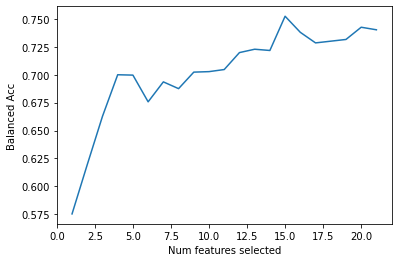

In [113]:
min_num_fts = 1
plt.figure()
plt.xlabel("Num features selected")
plt.ylabel("Balanced Acc")
plt.plot(range(min_num_fts, len(rfe.grid_scores_) + min_num_fts), rfe.grid_scores_)
plt.show()

In [114]:
rfe.grid_scores_

array([0.57523893, 0.61942308, 0.66272145, 0.69998252, 0.69965035,
       0.67571678, 0.69358974, 0.68752914, 0.70232517, 0.70277389,
       0.70464452, 0.71984266, 0.72284965, 0.7217366 , 0.75241841,
       0.73800117, 0.72853147, 0.73006993, 0.73160839, 0.74256993,
       0.74027389])

In [115]:

rk_df = pd.DataFrame({"genes": X_feats_100.columns.to_list(), "rank": rfe.ranking_})
rk_df = rk_df.sort_values(by="rank")
top_70 = rk_df.head(70)["genes"].to_list()
top_70

['CADPS_underexpr',
 'UBE2S_underexpr',
 'SPN_overexpr',
 'AP1B1_underexpr',
 'PPRC1_overexpr',
 'TIMM17A_overexpr',
 'CCDC15_underexpr',
 'HRASLS_overexpr',
 'IMPA1_overexpr',
 'HAND2_underexpr',
 'NR2E1_underexpr',
 'IMPAD1_underexpr',
 'CCDC59_overexpr',
 'ADRA2A_underexpr',
 'NELL1_overexpr',
 'FBXO38_overexpr',
 'EFCAB2_overexpr',
 'SMAD4_overexpr',
 'MYBBP1A_underexpr',
 'ADRA2A_overexpr',
 'GSK3B_underexpr',
 'SNX24_underexpr',
 'NVL_overexpr',
 'FBXO22_overexpr',
 'PLA2G12A_overexpr',
 'MCM2_underexpr',
 'TAS2R10_underexpr',
 'ZNF696_overexpr',
 'TRIT1_overexpr',
 'ZNF434_underexpr',
 'HIGD1B_overexpr',
 'COL4A3BP_underexpr',
 'SPTBN5_overexpr',
 'PPFIA3_overexpr',
 'RBBP8_underexpr',
 'FES_underexpr',
 'CDKN3_overexpr',
 'FZD1_overexpr',
 'AKR1D1_underexpr',
 'CXCL12_underexpr',
 'MYH7B_overexpr',
 'NECAP2_overexpr',
 'VPS39_underexpr',
 'HERC3_underexpr',
 'CNN3_underexpr',
 'CACNA1H_overexpr',
 'MBTPS2_underexpr',
 'LRP12_overexpr',
 'SPA17_underexpr',
 'USP53_underexpr',
 '

In [123]:
clf_q_acc_v3, cv_score_q_acc_v3, test_scores_q_acc_v3 = evaluate_ge((X_train_q, X_test_q, y_train, y_test), split=False, feats=top_70, params=params_q_acc_v2)

[12:04:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Score: 
balanced_accuracy      0.749767
recall_0               0.666667
precision_0            0.593338
recall_1               0.832867
precision_1            0.873763
auc                    0.831740
specificity            0.666667
average_precision_0    0.222084
dtype: float64

Test Score:
balanced_accuracy      0.660591
recall_0               0.490196
precision_0            0.510204
recall_1               0.830986
precision_1            0.819444
auc                    0.759597
specificity            0.490196
average_precision_0    0.221582
dtype: float64



In [127]:
print_score_comparison(cv_score_q_acc_v2, cv_score_q_acc_v3, header_1="100 feats", header_2="70 feats", title="Validation set\n")

	Validation set
	posOutcome
			100 feats		70 feats
		-------------------------------------------------------
balanced_accuracy:	74.03%				74.98%

recall_0:		64.17%				66.67%

precision_0:		59.12%				59.33%

recall_1:		83.89%				83.29%

precision_1:		86.65%				87.38%

auc:			82.76%				83.17%



In [126]:
print_score_comparison(test_scores_q_acc_v2, test_scores_q_acc_v3, header_1="100 feats", header_2="70 feats", title="Test set\n")

	Test set
	posOutcome
			100 feats		70 feats
		-------------------------------------------------------
balanced_accuracy:	68.02%				66.06%

recall_0:		52.94%				49.02%

precision_0:		52.94%				51.02%

recall_1:		83.10%				83.10%

precision_1:		83.10%				81.94%

auc:			74.91%				75.96%

